[array([1.59376158]), array([6.19053375])] w
[array([2.03899252]), array([-0.97453491])] b
[1.15431598e-07] Loss_min
[0.01328462] Loss_max


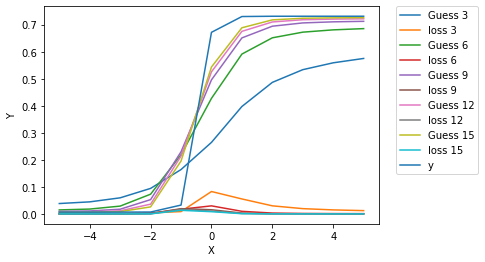

In [2]:
import numpy as np
import matplotlib.pyplot as plt
###############################################
def sigmoid(x):
    return 1/(1+np.exp(x))

def neuron(z):
    return sigmoid(z)

def Loss(y,y_hat):
    return 0.5*(y-y_hat)**2

def z(x,w,b):
    return (x*w)+b

################      Derivates       #################
def derivate_of_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

def der_of_w1(x,z1,w,z2,y_hat,y):
    return (x*derivate_of_sigmoid(z1)*w[1]*derivate_of_sigmoid(z2)*(y_hat-y))

def der_of_w2(x,z2,y_hat,y):
    return (x*derivate_of_sigmoid(z2)*(y_hat-y))

def der_of_b1(w,z2,y_hat,y):
    return derivate_of_sigmoid(1)*w[1]*derivate_of_sigmoid(z2)*(y_hat-y)

def der_of_b2(z1,y_hat,y):
    return sigmoid(1)*(y-y_hat)
##################     update & output      #####################

def update(w_or_b,derivate_of_w_or_b,alpha):
    return w_or_b-(alpha*derivate_of_w_or_b)

def forwardpass(x,w,b):
    return neuron(w[1]*neuron(w[0]*x+b[0])+b[1])

####################################################################
x=list(np.arange(-5,5.1))
y=[0.]*len(x)
w=[4,6]
b=[3,-1]
for i in range(0,len(x)):
    y[i]=forwardpass(x[i],w,b)

w=list(np.random.rand(2,1))
b=list(np.random.rand(2,1))


#y=[-1,-1,-1,-1,-1,-1,-0.95,-0.9,-0.8,-0.5,0,0.5,0.8,0.9,0.95,1,1,1,1,1,1]
#####################################################################
#w(x+1)=w(x)-dl/dw

def all(x,w,b,y):
    y_hat=[0.]*len(x)
    loss=[0.]*len(x)
    q=0
    for i in range(0,len(x)):
        z1=z(x[i],w[0],b[0])
        z2=z(neuron(z1),w[1],b[1])
        y_hat[i]=forwardpass(x[i],w,b)
        
        w[0]=update(w[0],der_of_w1(x[i],z1,w,z2,y_hat[i],y[i]),1)        
        w[1]=update(w[1],der_of_w2(x[i],z2,y_hat[i],y[i]),1)
        b[0]=update(b[0],der_of_b1(w,z2,y_hat[i],y[i]),1)         
        b[1]=update(b[1],der_of_b2(z1,y_hat[i],y[i]),1)
        
        loss[i]=Loss(y[i],y_hat[i])
    return y_hat,w,b,loss



q=0
for i in range(0,15):
    y_hat,w,b,loss=all(x,w,b,y)
    q+=1
    if q==3:
        q=0
        plt.plot(x,y_hat,label="Guess "+str(i+1))
        plt.plot(x,loss,label="loss "+str(i+1))

        
        
        

plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x,y,label="y")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

print(w,"w")
print(b,"b")
print(loss[np.argmin(loss)],"Loss_min")
print(loss[np.argmax(loss)],"Loss_max")
